## Setup

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact, fixed
from tqdm import tqdm

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, TSNE
from sklearn.cluster import KMeans, OPTICS, DBSCAN, SpectralClustering

plt.rcParams["figure.figsize"] = (14, 4)
pd.options.display.max_columns = 500

## Load

In [4]:
m4_info = pd.read_csv("../data/M4-info.csv")
m4_info.columns = ["id", "category", "freq", "fh", "sp", "start_date"]
m4_info["start_date"] = pd.to_datetime(m4_info["start_date"])
m4_info

,id,category,freq,fh,sp,start_date
0,Y1,Macro,1,6,Yearly,1979-01-01 12:00:00
1,Y2,Macro,1,6,Yearly,1979-01-01 12:00:00
2,Y3,Macro,1,6,Yearly,1979-01-01 12:00:00
3,Y4,Macro,1,6,Yearly,1979-01-01 12:00:00
4,Y5,Macro,1,6,Yearly,1979-01-01 12:00:00
...,...,...,...,...,...,...
99995,H410,Other,24,48,Hourly,2017-01-01 12:00:00
99996,H411,Other,24,48,Hourly,2017-01-01 12:00:00
99997,H412,Other,24,48,Hourly,2017-01-01 12:00:00
99998,H413,Other,24,48,Hourly,2017-12-06 12:00:00


In [5]:
daily_train_raw = pd.read_csv("../data/Train/Daily-train.csv")
daily_train_raw

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,...,V9671,V9672,V9673,V9674,V9675,V9676,V9677,V9678,V9679,V9680,V9681,V9682,V9683,V9684,V9685,V9686,V9687,V9688,V9689,V9690,V9691,V9692,V9693,V9694,V9695,V9696,V9697,V9698,V9699,V9700,V9701,V9702,V9703,V9704,V9705,V9706,V9707,V9708,V9709,V9710,V9711,V9712,V9713,V9714,V9715,V9716,V9717,V9718,V9719,V9720,V9721,V9722,V9723,V9724,V9725,V9726,V9727,V9728,V9729,V9730,V9731,V9732,V9733,V9734,V9735,V9736,V9737,V9738,V9739,V9740,V9741,V9742,V9743,V9744,V9745,V9746,V9747,V9748,V9749,V9750,V9751,V9752,V9753,V9754,V9755,V9756,V9757,V9758,V9759,V9760,V9761,V9762,V9763,V9764,V9765,V9766,V9767,V9768,V9769,V9770,V9771,V9772,V9773,V9774,V9775,V9776,V9777,V9778,V9779,V9780,V9781,V9782,V9783,V9784,V9785,V9786,V9787,V9788,V9789,V9790,V9791,V9792,V9793,V9794,V9795,V9796,V9797,V9798,V9799,V9800,V9801,V9802,V9803,V9804,V9805,V9806,V9807,V9808,V9809,V9810,V9811,V9812,V9813,V9814,V9815,V9816,V9817,V9818,V9819,V9820,V9821,V9822,V9823,V9824,V9825,V9826,V9827,V9828,V9829,V9830,V9831,V9832,V9833,V9834,V9835,V9836,V9837,V9838,V9839,V9840,V9841,V9842,V9843,V9844,V9845,V9846,V9847,V9848,V9849,V9850,V9851,V9852,V9853,V9854,V9855,V9856,V9857,V9858,V9859,V9860,V9861,V9862,V9863,V9864,V9865,V9866,V9867,V9868,V9869,V9870,V9871,V9872,V9873,V9874,V9875,V9876,V9877,V9878,V9879,V9880,V9881,V9882,V9883,V9884,V9885,V9886,V9887,V9888,V9889,V9890,V9891,V9892,V9893,V9894,V9895,V9896,V9897,V9898,V9899,V9900,V9901,V9902,V9903,V9904,V9905,V9906,V9907,V9908,V9909,V9910,V9911,V9912,V9913,V9914,V9915,V9916,V9917,V9918,V9919,V9920
0,D1,1017.10,1019.30,1017.00,1019.20,1018.70,1015.60,1018.50,1018.30,1018.40,1021.50,1023.00,1023.30,1020.50,1021.40,1018.10,1022.60,1022.60,1021.00,1020.10,1017.00,1019.30,1017.30,1016.10,1017.80,1019.30,1025.10,1024.80,1025.10,1025.10,1022.60,1021.20,1017.20,1041.50,1041.70,1038.90,1041.00,1042.90,1042.10,1043.90,1039.00,1037.30,1033.70,1032.50,1036.30,1037.50,1040.00,1038.40,1035.30,1032.00,1028.10,1032.20,1030.20,1031.20,1032.80,1030.30,1030.20,1028.10,1022.10,1024.40,1023.40,1026.30,1024.00,1026.10,1031.00,1037.60,1036.60,1037.40,1035.40,1038.90,1038.70,1036.50,1036.40,1036.80,1035.30,1032.60,1029.30,1031.30,1027.40,1028.60,1025.80,1026.00,1022.30,1020.10,1017.70,1018.00,1023.20,1024.20,1020.50,1022.20,1025.30,1023.30,1035.30,1036.70,1035.10,1032.50,1028.7,1028.10,1025.60,1027.90,1025.00,1025.70,1025.00,1023.70,1025.50,1025.80,1030.50,1035.10,1034.20,1032.20,1033.60,1045.60,1040.30,1035.90,1035.40,1031.00,1035.10,1022.10,1020.40,1019.60,1023.20,1016.50,1011.60,1013.90,1011.30,1020.90,1023.40,1019.60,1016.70,1012.00,1012.70,1010.70,1002.50,991.50,992.90,997.10,1001.60,997.20,1001.90,1011.70,1005.70,1018.70,1016.50,1018.30,1014.80,1011.00,1018.70,1009.90,1012.70,1015.00,1010.40,1099.00,1095.20,1098.10,1094.80,1097.90,1085.20,1086.00,1088.20,1088.60,1085.8,1080.40,1077.20,1075.70,1080.30,1081.60,1080.30,1094.80,1097.20,1096.20,10

In [7]:
m4_info.pivot_table(values=["freq", "fh"], index="sp").loc["Daily"]

fh      14
freq     1
Name: Daily, dtype: int64

In [8]:
m4_info.pivot_table(index="sp", columns="category", aggfunc="size").fillna(0).astype("int").loc["Daily"]

category
Demographic      10
Finance        1559
Industry        422
Macro           127
Micro          1476
Other           633
Name: Daily, dtype: int32

## Prepare

In [6]:
def build_timestamp(ts):
    start = ts["start_date"].iloc[0]
    ts = ts.drop(columns=["start_date"])
    ts["ds"] = pd.date_range(start=start, periods=len(ts))
    return ts

In [7]:
def initial_preprocessing(df):
    df = df.copy()
    df = df.melt(id_vars="V1", var_name="t", value_name="y")
    df = df.rename(columns={"V1": "id"})
    df = df.merge(m4_info[["id", "category", "start_date"]], how="left", on="id")
    df["id"] = df["id"].str[1:].astype("int")
    df["t"] = df["t"].str[1:].astype("int") - 1
    df["category"] = df["category"].astype("category")
    df = df.groupby("id", group_keys=False).apply(lambda x: x.loc[:x.y.last_valid_index()])
    df = df.groupby("id").apply(build_timestamp)
    df = df[["id", "ds", "t", "y", "category"]].copy()
    return df

In [8]:
daily_train = initial_preprocessing(daily_train_raw)
daily_train

,id,ds,t,y,category
0,1,1994-03-01 12:00:00,1,1017.1,Macro
4227,1,1994-03-02 12:00:00,2,1019.3,Macro
8454,1,1994-03-03 12:00:00,3,1017.0,Macro
12681,1,1994-03-04 12:00:00,4,1019.2,Macro
16908,1,1994-03-05 12:00:00,5,1018.7,Macro
...,...,...,...,...,...
18750971,4227,2012-04-22 12:00:00,4436,15111.5,Other
18755198,4227,2012-04-23 12:00:00,4437,15154.0,Other
18759425,4227,2012-04-24 12:00:00,4438,15208.6,Other
18763652,4227,2012-04-25 12:00:00,4439,15108.0,Other


In [9]:
daily_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9964658 entries, 0 to 18767879
Data columns (total 5 columns):
 #   Column    Dtype         
---  ------    -----         
 0   id        int32         
 1   ds        datetime64[ns]
 2   t         int32         
 3   y         float64       
 4   category  category      
dtypes: category(1), datetime64[ns](1), float64(1), int32(2)
memory usage: 313.6 MB


In [10]:
daily_train.isna().sum()

id          0
ds          0
t           0
y           0
category    0
dtype: int64

In [11]:
daily_train.to_csv("../data/processed/daily-train-base.csv", index=False)

In [ ]:
del daily_train_raw

## Features

In [2]:
daily_train = pd.read_csv("../data/processed/daily-train-base.csv", parse_dates=["ds"])
daily_train

,id,ds,t,y,category
0,1,1994-03-01 12:00:00,1,1017.1,Macro
1,1,1994-03-02 12:00:00,2,1019.3,Macro
2,1,1994-03-03 12:00:00,3,1017.0,Macro
3,1,1994-03-04 12:00:00,4,1019.2,Macro
4,1,1994-03-05 12:00:00,5,1018.7,Macro
...,...,...,...,...,...
9964653,4227,2012-04-22 12:00:00,4436,15111.5,Other
9964654,4227,2012-04-23 12:00:00,4437,15154.0,Other
9964655,4227,2012-04-24 12:00:00,4438,15208.6,Other
9964656,4227,2012-04-25 12:00:00,4439,15108.0,Other


In [3]:
ys = daily_train[["id", "ds", "y"]].copy()

In [4]:
daily_train_features = extract_features(
    ys, 
    column_id="id", 
    column_sort="ds",
    n_jobs=2,
    # default_fc_parameters=EfficientFCParameters(),
)

Feature Extraction: 100%|██████████████████████████████████████████████████████████| 10/10 [6:56:10<00:00, 2497.09s/it]


In [5]:
daily_train_features.to_csv("../data/processed/daily-train-features-full.csv", index=False)

## Projections

In [17]:
def plot_proj(X, d=2, proj=None, cluster=None, scaler=None, width=600, height=600, marker_size=3):
    if d not in {2, 3}:
        raise Exception("d must be 2 or 3.")
    
    if proj is None:
        proj = PCA()
        
    if scaler is None:
        scaler = StandardScaler()
    
    ids = X.id 
    proj.n_components = d
    X = scaler.fit_transform(X)
    X_proj = proj.fit_transform(X)
    X_proj = StandardScaler().fit_transform(X_proj)
    
    if cluster is not None:
        labels = cluster.fit_predict(X_proj)
    else:
        labels = None

    if d == 2:
        fig = px.scatter(
            x=X_proj[:, 0], 
            y=X_proj[:, 1], 
            color=labels, 
            width=width, 
            height=height,
            hover_data={"id": ids},
        )
    
    if d == 3:
        fig = px.scatter_3d(
            x=X_proj[:, 0], 
            y=X_proj[:, 1],
            z=X_proj[:, 2],
            color=labels, 
            width=width, 
            height=height,
            hover_data={"id": ids},
        )
        
    fig.update_traces(marker={'size': marker_size})
    return fig

In [4]:
daily_train = pd.read_csv("../data/processed/daily-train-base.csv", parse_dates=["ds"])
daily_train

,id,ds,t,y,category
0,1,1994-03-01 12:00:00,1,1017.1,Macro
1,1,1994-03-02 12:00:00,2,1019.3,Macro
2,1,1994-03-03 12:00:00,3,1017.0,Macro
3,1,1994-03-04 12:00:00,4,1019.2,Macro
4,1,1994-03-05 12:00:00,5,1018.7,Macro
...,...,...,...,...,...
9964653,4227,2012-04-22 12:00:00,4436,15111.5,Other
9964654,4227,2012-04-23 12:00:00,4437,15154.0,Other
9964655,4227,2012-04-24 12:00:00,4438,15208.6,Other
9964656,4227,2012-04-25 12:00:00,4439,15108.0,Other


In [226]:
daily_train_features = pd.read_csv("../data/processed/daily-train-features-r.csv")
daily_train_features

,id,acf1,acf10,diff1_acf1,diff1_acf10,diff2_acf1,diff2_acf10,season_acf1,pacf5,diff1_pacf5,diff2_pacf5,season_pacf,ndiffs,nsdiffs,var_tiled_mean,var_tiled_var,shift_level_max,shift_level_index,trend_strength,seasonal_strength_week,seasonal_peak_week,seasonal_trough_week,spikiness,linearity,curvature,stl_e_acf1,stl_e_acf10,spectral_entropy,n_crossing_points,longest_flat_spot,coef_hurst,lambda_guerrero
0,1,0.997059,9.687135e+00,-0.029772,7.626758e-03,-0.518825,2.734535e-01,0.979941,9.942914e-01,7.633271e-03,5.424459e-01,-0.010700,1,0,1.010469,0.000011,104.042857,306,0.999745,0.212893,5,2,8.365195e-03,9853.294673,1325.739954,0.326544,0.342042,0.009502,9,150,0.999954,1.974562
1,2,0.997316,9.702510e+00,-0.004649,4.072618e-03,-0.520349,2.801685e-01,0.980919,9.961016e-01,3.727573e-03,5.231172e-01,0.010722,1,0,0.997391,0.000358,230.471429,930,0.997425,0.167491,6,2,3.652157e-01,7551.941915,-411.018633,0.353714,0.337406,0.211226,12,93,0.999860,-0.899927
2,3,0.916272,3.739627e+00,-0.012783,2.531199e-03,-0.498712,2.487157e-01,0.458197,8.435482e-01,1.878764e-03,5.251920e-01,-0.032470,1,0,0.800603,0.755309,198.771429,109,0.919896,0.162490,4,3,6.091840e+01,238.468579,304.150654,0.319871,0.273264,0.610410,4,9,0.999172,-0.899927
3,4,0.846963,2.404443e+00,-0.070979,5.882831e-02,-0.502273,3.038757e-01,0.334851,7.176773e-01,5.054175e-02,5.979179e-01,0.033282,0,0,0.829212,0.167636,350.000000,129,0.850668,0.241823,1,0,2.571114e+03,319.034648,1086.075281,0.279155,0.225505,0.740640,32,6,0.996059,1.999927
4,5,0.974411,7.241019e+00,0.110908,1.220225e-01,-0.477198,3.813929e-01,0.805430,9.575942e-01,3.493730e-02,4.545096e-01,-0.017917,1,0,1.035495,0.014047,1444.441429,67,0.989273,0.289039,5,1,3.821326e+04,11248.036869,867.517007,0.359820,0.333743,0.281091,1,30,0.999633,1.999927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4222,4223,0.068836,2.568894e-02,-0.001475,5.514170e-05,-0.007557,1.436517e-04,0.042044,1.491678e-02,7.155843e-06,8.258976e-05,0.027377,0,0,0.201078,36.505275,6779.142857,2,0.512779,0.241573,1,2,7.069972e+06,-1092.843208,-357.321423,-0.105579,0.048743,0.996563,27,288,0.887489,-0.899927
4223,4224,0.175845,1.787344e-01,-0.001751,3.800695e-04,-0.020961,8.487453e-04,0.112377,7.729266e-02,1.646795e-04,6.507336e-04,0.040451,0,0,0.304386,24.372381,6033.000000,2,0.577006,0.240908,1,2,7.051393e+06,-611.845729,-693.134000,-0.103305,0.047747,0.973822,21,102,0.950371,-0.899927
4224,4225,0.000164,1.052583e-07,0.000027,9.116194e-08,0.000097,1.464056e-07,0.000039,8.559907e-08,2.591848e-08,6.655798e-08,0.000039,0,0,0.142605,38.708765,347814.428571,2,0.472912,0.239622,1,2,6.484301e+13,-44703.400633,54048.752687,-0.103532,0.049391,1.000000,21,264,0.500069,-0.899927
4225,4226,0.999604,9.947588e+00,0.032557,1.659804e-02,-0.515475,2.734492e-01,0.996580,1.007626e+00,1.381027e-02,5.033698e-01,0.032775,1,0,0.999410,0.000010,636.411429,1612,0.999671,0.159099,6,4,9.547394e-02,-9727.089480,-18421.178971,0.352933,0.381551,0.238542,21,802,0.999954,-0.395214


In [24]:
# daily_train_features = daily_train_features.loc[:, daily_train_features.std() != 0].dropna(axis=1)

In [260]:
daily_train_features_sel = daily_train_features[["id", "shift_level_max", "spikiness", "linearity", "spectral_entropy"]].copy()

In [261]:
daily_train_features_sel["shift_level_max"] = np.log(daily_train_features_sel["shift_level_max"])
daily_train_features_sel["spikiness"] = np.log(daily_train_features_sel["spikiness"])

<AxesSubplot:xlabel='spectral_entropy', ylabel='Count'>

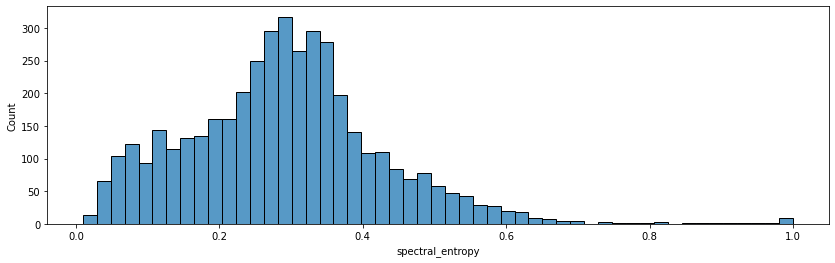

In [262]:
sns.histplot(daily_train_features_sel["spectral_entropy"])

C:\Users\ariel\anaconda3\envs\m4-forecasting\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='spikiness'>

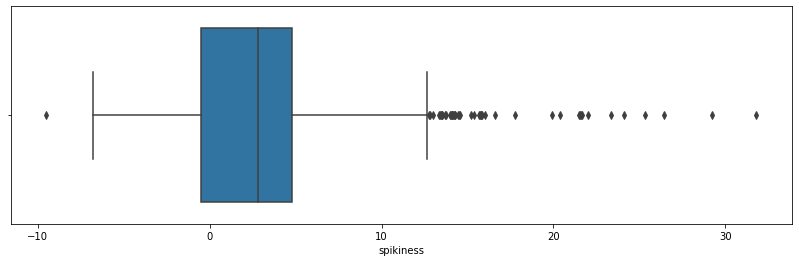

In [234]:
sns.boxplot(np.log(daily_train_features_sel["spikiness"]))

In [237]:
daily_train_features["spikiness"].describe()

count    4.227000e+03
mean     1.658078e+10
std      1.000048e+12
min      7.433125e-05
25%      6.095966e-01
50%      1.692762e+01
75%      1.182388e+02
max      6.484301e+13
Name: spikiness, dtype: float64

<AxesSubplot:xlabel='shift_level_max', ylabel='Count'>

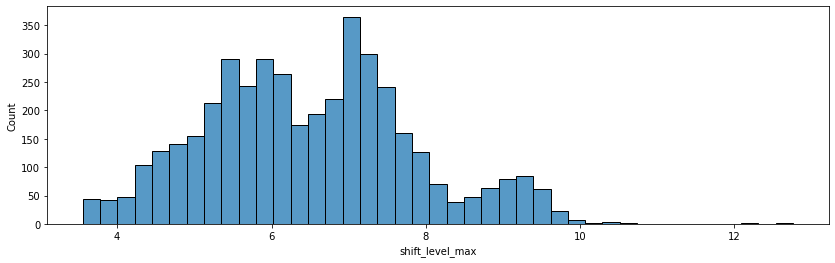

In [246]:
sns.histplot(np.log(daily_train_features_sel["shift_level_max"]))

<AxesSubplot:xlabel='spikiness', ylabel='Count'>

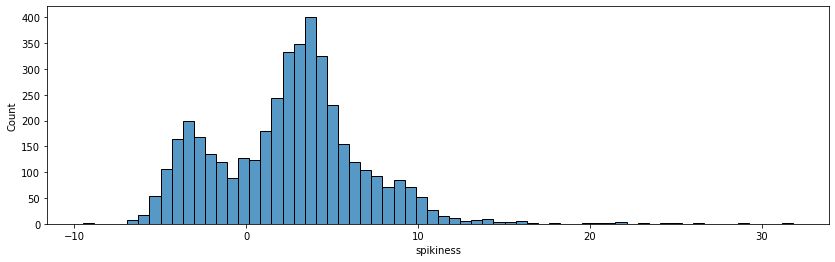

In [235]:
sns.histplot(np.log(daily_train_features_sel["spikiness"]))

<AxesSubplot:ylabel='Count'>

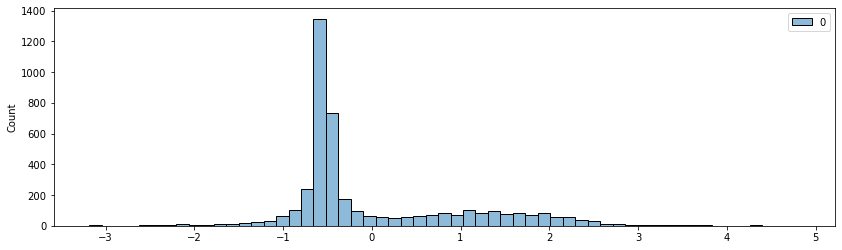

In [244]:
sns.histplot(StandardScaler().fit_transform(daily_train_features_sel[["linearity"]]))

<AxesSubplot:xlabel='spikiness', ylabel='Count'>

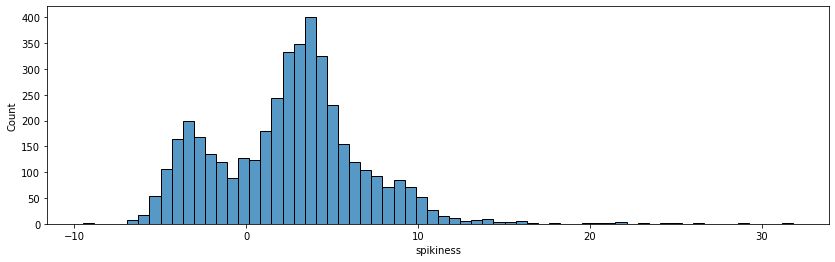

In [265]:
sns.histplot(daily_train_features_sel["spikiness"])

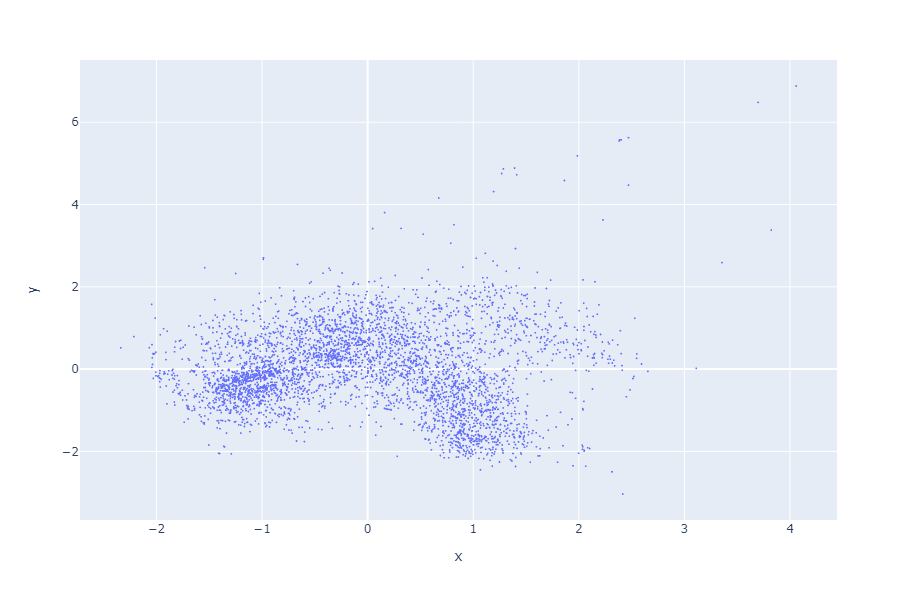

In [267]:
plot_proj(daily_train_features_sel, d=2, proj=None, cluster=None, marker_size=2)

C:\Users\ariel\anaconda3\envs\m4-forecasting\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.



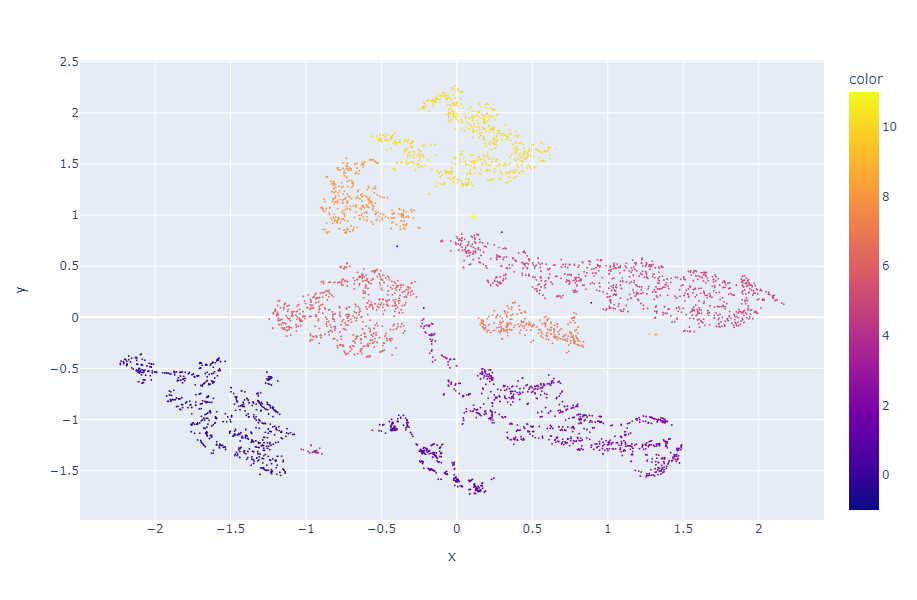

In [280]:
proj = TSNE(
    perplexity=50,
    learning_rate="auto",
    init="pca",
)
cluster = DBSCAN(eps=0.1)
plot_proj(daily_train_features_sel, d=2, proj=proj, cluster=cluster, marker_size=2)

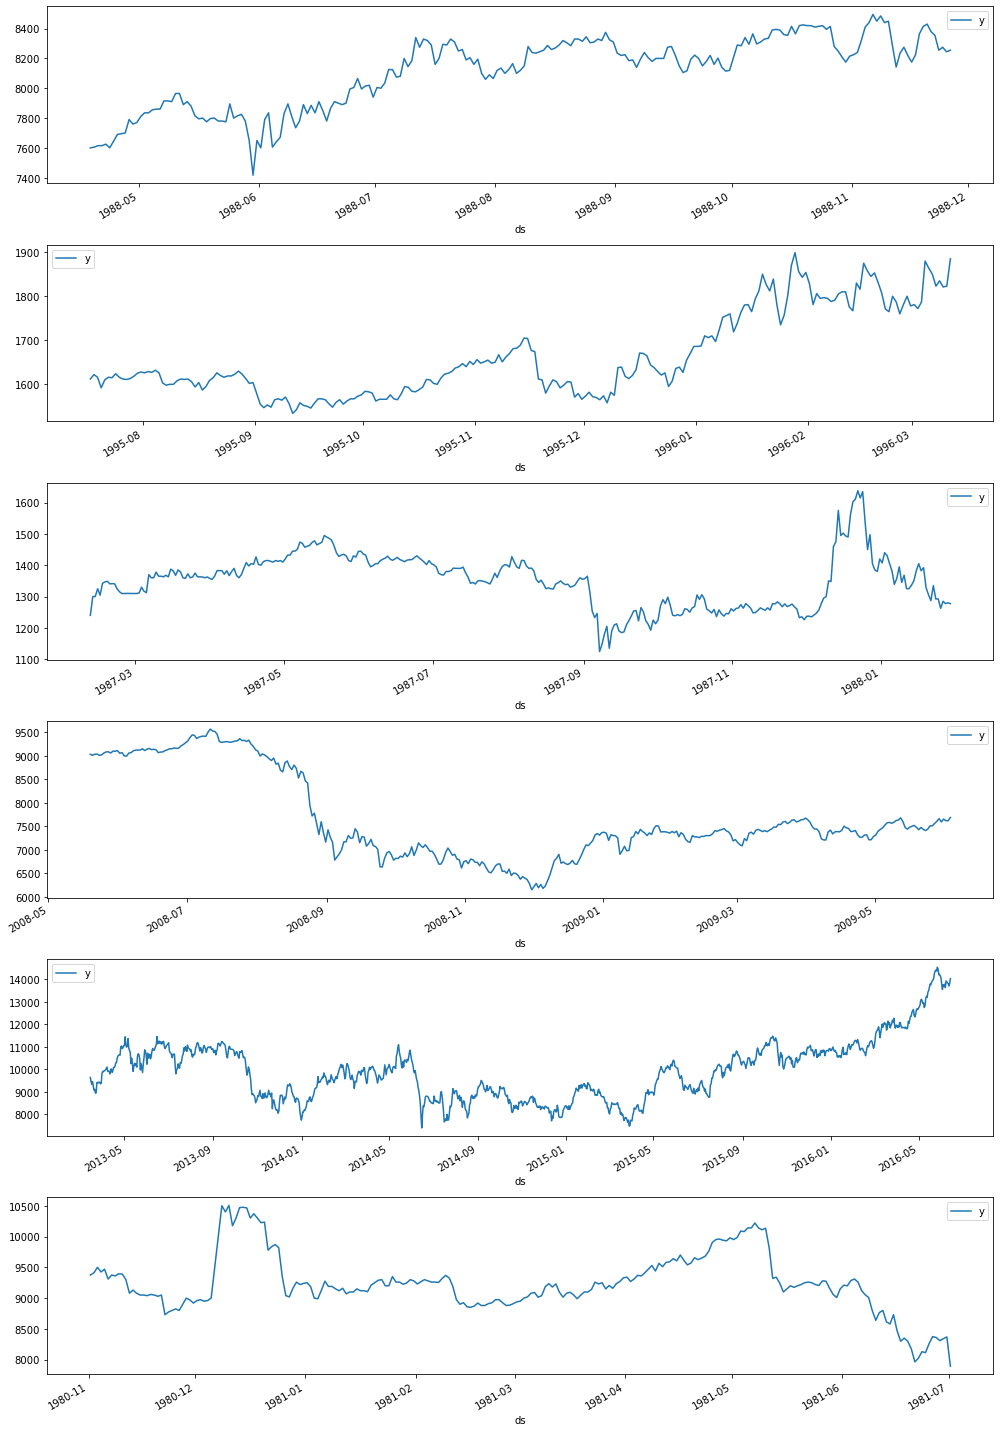

In [283]:
sample = [1810, 1920, 1811, 2125, 1356, 1824]
#np.random.shuffle(group)
#sample = group[:10]

f, axs = plt.subplots(len(sample), figsize=(14, 20))
if not isinstance(axs, np.ndarray):
    axs = [axs]
for ax, elem in zip(axs, sample):
    daily_train.loc[daily_train.id == elem, ["ds", "y"]].set_index("ds").plot(ax=ax)
    
f.tight_layout()

C:\Users\ariel\anaconda3\envs\m4-forecasting\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='shift_level_max'>

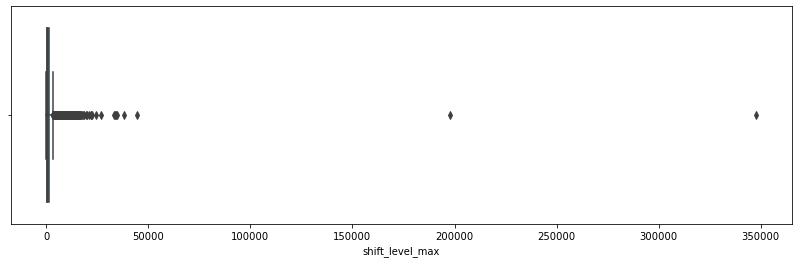

In [271]:
sns.boxplot(daily_train_features.shift_level_max)

In [57]:
shift_level = MinMaxScaler().fit_transform(daily_train_features.loc[:, ["shift_level_max"]])
shift_level = pd.Series(shift_level.flatten(), index=daily_train_features.id)

<AxesSubplot:>

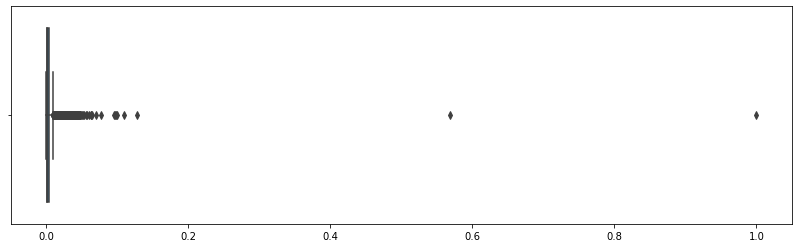

In [59]:
sns.boxplot(x=shift_level)

C:\Users\ariel\anaconda3\envs\m4-forecasting\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

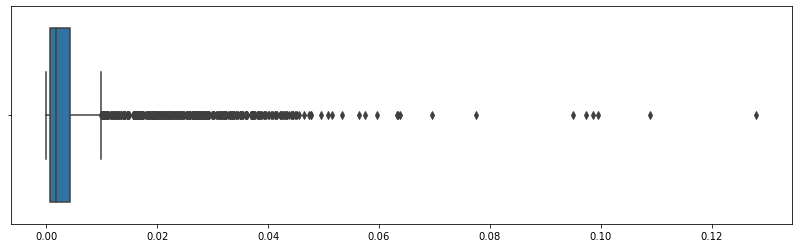

In [62]:
sns.boxplot(shift_level[shift_level < 0.2])

In [65]:
q3 = shift_level.quantile(0.75)
q1 = shift_level.quantile(0.25)
iqr = q3 - q1
upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

In [101]:
group = list(shift_level[shift_level > shift_level.quantile(0.9)].index)

In [102]:
len(group)

423

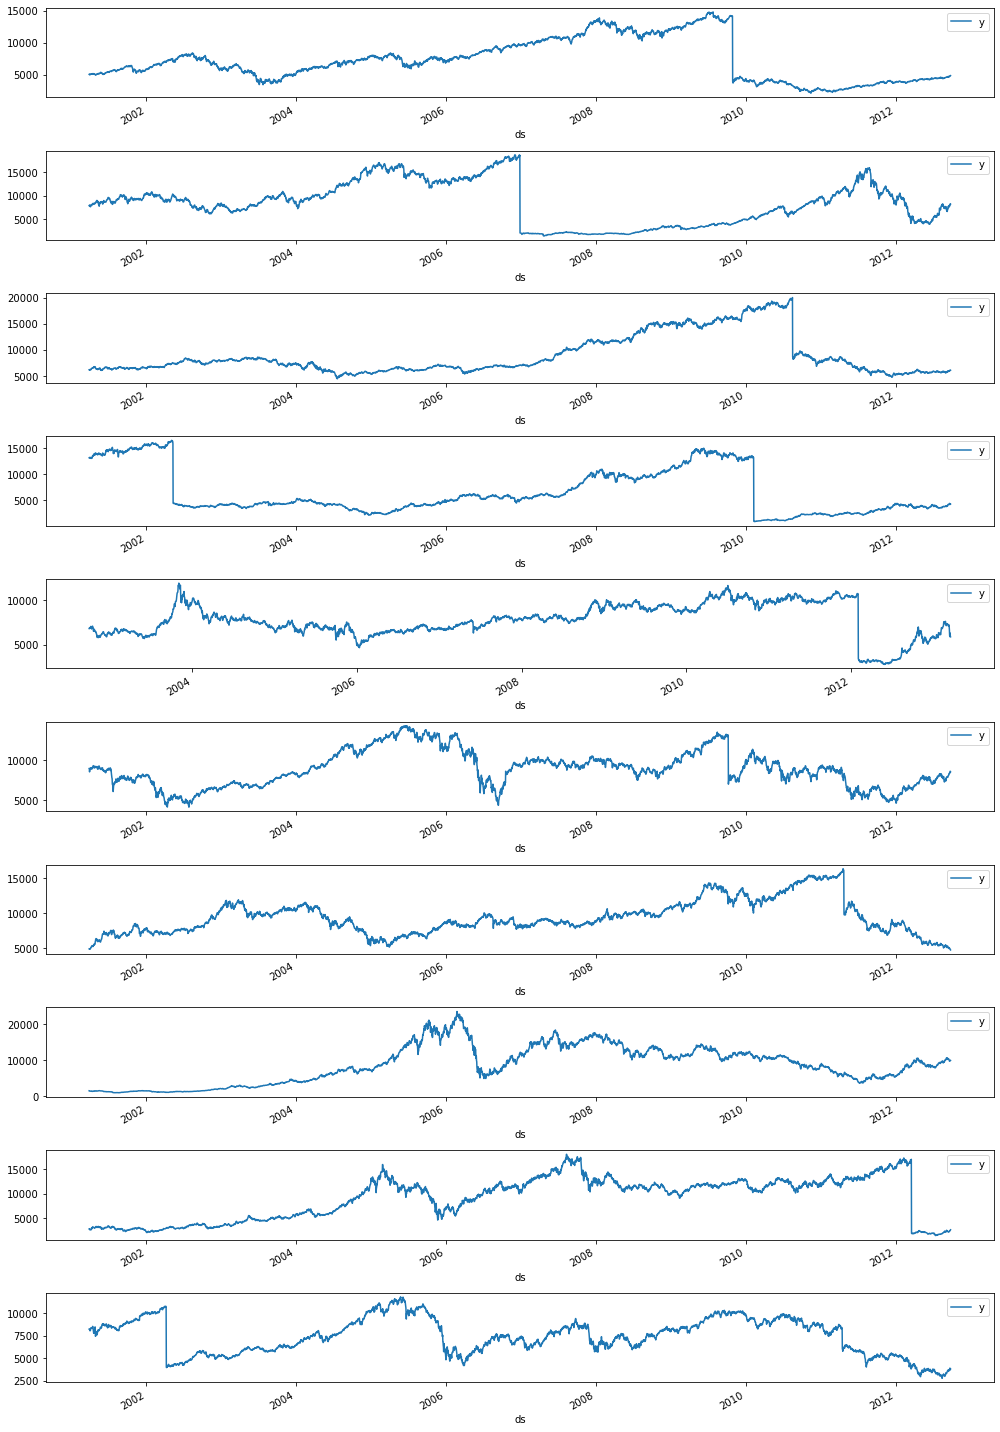

In [103]:
#sample = [1245, 2520, 1513, 1526, 193, 2016]
np.random.shuffle(group)
sample = group[:10]

f, axs = plt.subplots(len(sample), figsize=(14, 20))
if not isinstance(axs, np.ndarray):
    axs = [axs]
for ax, elem in zip(axs, sample):
    daily_train.loc[daily_train.id == elem, ["ds", "y"]].set_index("ds").plot(ax=ax)
    
f.tight_layout()

In [129]:
daily_train_features["nsdiffs"].unique()

array([0], dtype=int64)

In [139]:
daily_train_features

,id,acf1,acf10,diff1_acf1,diff1_acf10,diff2_acf1,diff2_acf10,season_acf1,pacf5,diff1_pacf5,diff2_pacf5,season_pacf,ndiffs,nsdiffs,var_tiled_mean,var_tiled_var,shift_level_max,shift_level_index,trend_strength,seasonal_strength_week,seasonal_peak_week,seasonal_trough_week,spikiness,linearity,curvature,stl_e_acf1,stl_e_acf10,spectral_entropy,n_crossing_points,longest_flat_spot,coef_hurst,lambda_guerrero
0,1,0.997059,9.687135e+00,-0.029772,7.626758e-03,-0.518825,2.734535e-01,0.979941,9.942914e-01,7.633271e-03,5.424459e-01,-0.010700,1,0,1.010469,0.000011,104.042857,306,0.999745,0.212893,5,2,8.365195e-03,9853.294673,1325.739954,0.326544,0.342042,0.009502,9,150,0.999954,1.974562
1,2,0.997316,9.702510e+00,-0.004649,4.072618e-03,-0.520349,2.801685e-01,0.980919,9.961016e-01,3.727573e-03,5.231172e-01,0.010722,1,0,0.997391,0.000358,230.471429,930,0.997425,0.167491,6,2,3.652157e-01,7551.941915,-411.018633,0.353714,0.337406,0.211226,12,93,0.999860,-0.899927
2,3,0.916272,3.739627e+00,-0.012783,2.531199e-03,-0.498712,2.487157e-01,0.458197,8.435482e-01,1.878764e-03,5.251920e-01,-0.032470,1,0,0.800603,0.755309,198.771429,109,0.919896,0.162490,4,3,6.091840e+01,238.468579,304.150654,0.319871,0.273264,0.610410,4,9,0.999172,-0.899927
3,4,0.846963,2.404443e+00,-0.070979,5.882831e-02,-0.502273,3.038757e-01,0.334851,7.176773e-01,5.054175e-02,5.979179e-01,0.033282,0,0,0.829212,0.167636,350.000000,129,0.850668,0.241823,1,0,2.571114e+03,319.034648,1086.075281,0.279155,0.225505,0.740640,32,6,0.996059,1.999927
4,5,0.974411,7.241019e+00,0.110908,1.220225e-01,-0.477198,3.813929e-01,0.805430,9.575942e-01,3.493730e-02,4.545096e-01,-0.017917,1,0,1.035495,0.014047,1444.441429,67,0.989273,0.289039,5,1,3.821326e+04,11248.036869,867.517007,0.359820,0.333743,0.281091,1,30,0.999633,1.999927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4222,4223,0.068836,2.568894e-02,-0.001475,5.514170e-05,-0.007557,1.436517e-04,0.042044,1.491678e-02,7.155843e-06,8.258976e-05,0.027377,0,0,0.201078,36.505275,6779.142857,2,0.512779,0.241573,1,2,7.069972e+06,-1092.843208,-357.321423,-0.105579,0.048743,0.996563,27,288,0.887489,-0.899927
4223,4224,0.175845,1.787344e-01,-0.001751,3.800695e-04,-0.020961,8.487453e-04,0.112377,7.729266e-02,1.646795e-04,6.507336e-04,0.040451,0,0,0.304386,24.372381,6033.000000,2,0.577006,0.240908,1,2,7.051393e+06,-611.845729,-693.134000,-0.103305,0.047747,0.973822,21,102,0.950371,-0.899927
4224,4225,0.000164,1.052583e-07,0.000027,9.116194e-08,0.000097,1.464056e-07,0.000039,8.559907e-08,2.591848e-08,6.655798e-08,0.000039,0,0,0.142605,38.708765,347814.428571,2,0.472912,0.239622,1,2,6.484301e+13,-44703.400633,54048.752687,-0.103532,0.049391,1.000000,21,264,0.500069,-0.899927
4225,4226,0.999604,9.947588e+00,0.032557,1.659804e-02,-0.515475,2.734492e-01,0.996580,1.007626e+00,1.381027e-02,5.033698e-01,0.032775,1,0,0.999410,0.000010,636.411429,1612,0.999671,0.159099,6,4,9.547394e-02,-9727.089480,-18421.178971,0.352933,0.381551,0.238542,21,802,0.999954,-0.395214


In [152]:
spikiness = MinMaxScaler().fit_transform(daily_train_features[["spikiness"]])
spikiness = pd.Series(spikiness.flatten(), index=daily_train_features.index)

In [161]:
spikiness = daily_train_features["spikiness"]

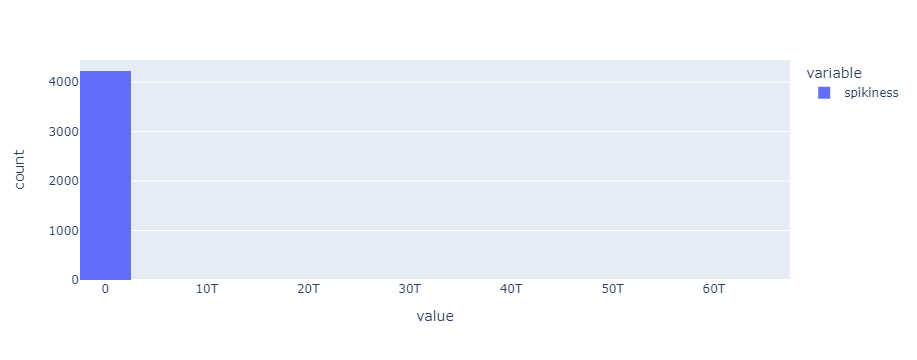

In [162]:
px.histogram(spikiness, nbins=20)

In [163]:
spikiness.quantile(0.9)

2122.8564669140696

In [148]:
p

(array([4226,    0,    0,    0,    0,    0,    0,    0,    0,    1],
       dtype=int64),
 array([-1.65819475e-02,  6.46817410e+00,  1.29529302e+01,  1.94376862e+01,
         2.59224423e+01,  3.24071983e+01,  3.88919544e+01,  4.53767104e+01,
         5.18614665e+01,  5.83462225e+01,  6.48309786e+01]))

In [171]:
spikiness

0       8.365195e-03
1       3.652157e-01
2       6.091840e+01
3       2.571114e+03
4       3.821326e+04
            ...     
4222    7.069972e+06
4223    7.051393e+06
4224    6.484301e+13
4225    9.547394e-02
4226    6.275686e+01
Name: spikiness, Length: 4227, dtype: float64

In [218]:
daily_train_features.coef_hurst.quantile(0.3)

0.9997734480731076

In [211]:
daily_train_features.coef_hurst.quantile(0.05)

0.9987196909172869

<AxesSubplot:xlabel='lambda_guerrero', ylabel='Count'>

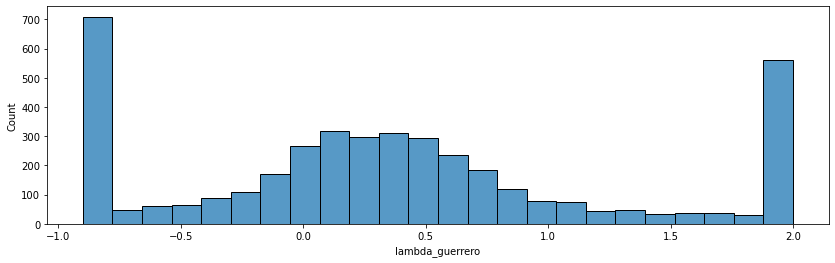

In [221]:
sns.histplot(daily_train_features.lambda_guerrero)

846


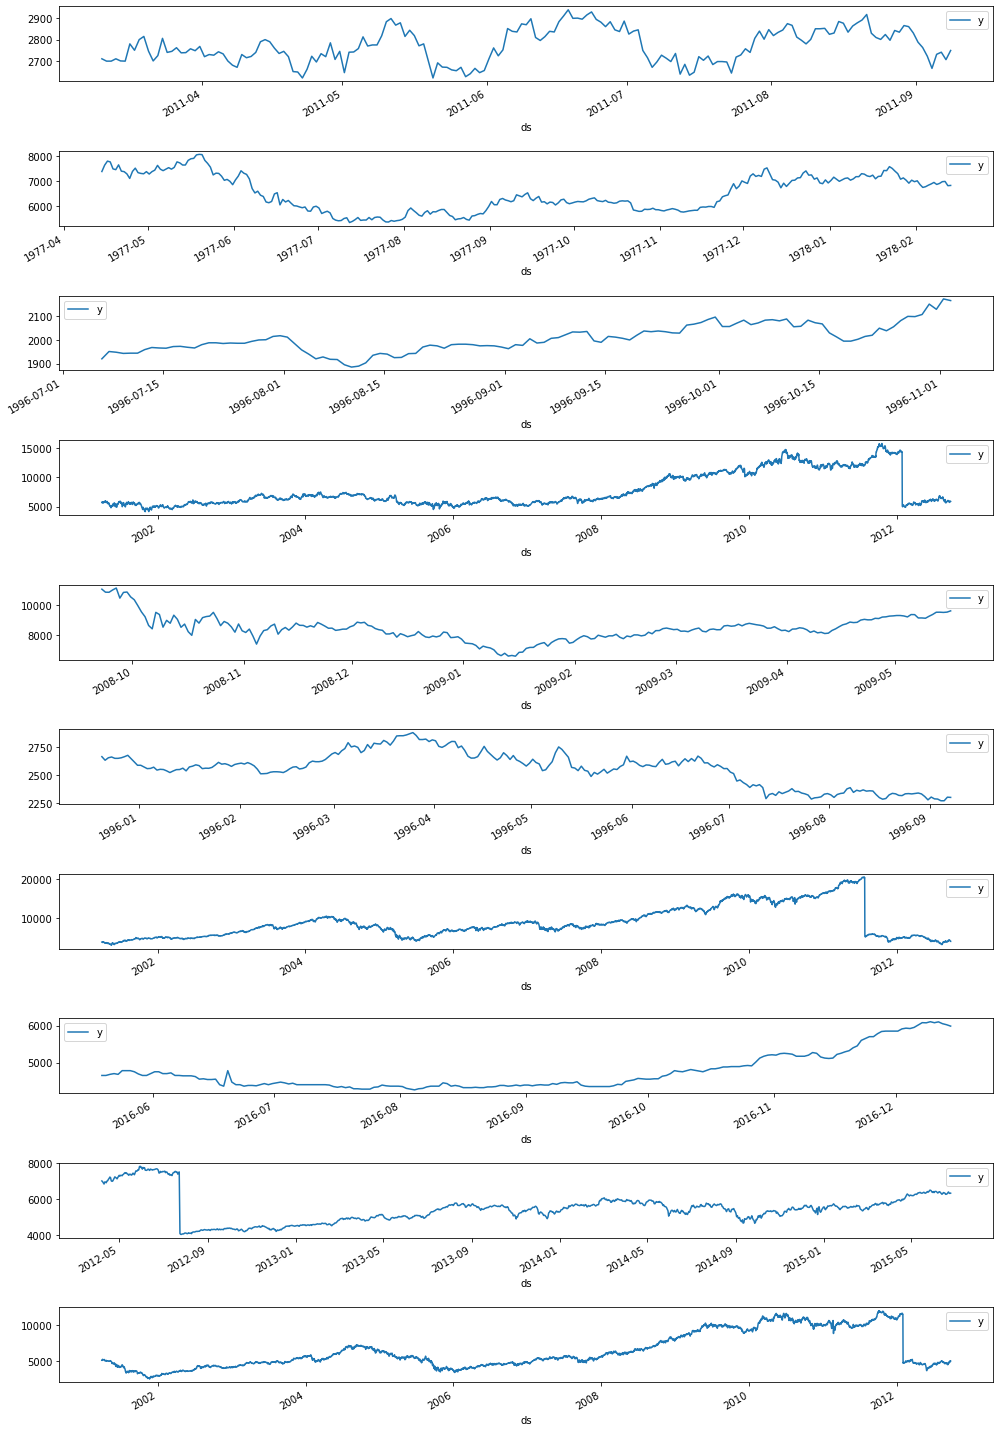

In [225]:
#sample = daily_train_features.loc[daily_train_features.ndiffs == 0, "id"].tolist()
sample = daily_train_features.loc[
    daily_train_features.lambda_guerrero < daily_train_features.lambda_guerrero.quantile(0.2), "id"
].tolist()
#sample = daily_train_features.loc[daily_train_features.nsdiffs == 1, "id"].tolist()
print(len(sample))
np.random.shuffle(sample)
sample = sample[:10]

f, axs = plt.subplots(len(sample), figsize=(14, 20))
if not isinstance(axs, np.ndarray):
    axs = [axs]
for ax, elem in zip(axs, sample):
    daily_train.loc[daily_train.id == elem, ["ds", "y"]].set_index("ds").plot(ax=ax)
    
f.tight_layout()

## Cluster

In [43]:
daily_train = pd.read_csv("../data/processed/daily-train-base.csv", parse_dates=["ds"])
daily_train

,id,ds,t,y,category
0,1,1994-03-01 12:00:00,1,1017.1,Macro
1,1,1994-03-02 12:00:00,2,1019.3,Macro
2,1,1994-03-03 12:00:00,3,1017.0,Macro
3,1,1994-03-04 12:00:00,4,1019.2,Macro
4,1,1994-03-05 12:00:00,5,1018.7,Macro
...,...,...,...,...,...
9964653,4227,2012-04-22 12:00:00,4436,15111.5,Other
9964654,4227,2012-04-23 12:00:00,4437,15154.0,Other
9964655,4227,2012-04-24 12:00:00,4438,15208.6,Other
9964656,4227,2012-04-25 12:00:00,4439,15108.0,Other


In [36]:
daily_train_features = pd.read_csv("../data/processed/daily-train-features-full.csv")
daily_train_features

,y__variance_larger_than_standard_deviation,y__has_duplicate_max,y__has_duplicate_min,y__has_duplicate,y__sum_values,y__abs_energy,y__mean_abs_change,y__mean_change,y__mean_second_derivative_central,y__median,y__mean,y__length,y__standard_deviation,y__variation_coefficient,y__variance,y__skewness,y__kurtosis,y__root_mean_square,y__absolute_sum_of_changes,y__longest_strike_below_mean,y__longest_strike_above_mean,y__count_above_mean,y__count_below_mean,y__last_location_of_maximum,y__first_location_of_maximum,y__last_location_of_minimum,y__first_location_of_minimum,y__percentage_of_reoccurring_values_to_all_values,y__percentage_of_reoccurring_datapoints_to_all_datapoints,y__sum_of_reoccurring_values,y__sum_of_reoccurring_data_points,y__ratio_value_number_to_time_series_length,y__sample_entropy,y__maximum,y__absolute_maximum,y__minimum,y__benford_correlation,y__time_reversal_asymmetry_statistic__lag_1,y__time_reversal_asymmetry_statistic__lag_2,y__time_reversal_asymmetry_statistic__lag_3,y__c3__lag_1,y__c3__lag_2,y__c3__lag_3,y__cid_ce__normalize_True,y__cid_ce__normalize_False,y__symmetry_looking__r_0.0,y__symmetry_looking__r_0.05,y__symmetry_looking__r_0.1,y__symmetry_looking__r_0.15000000000000002,y__symmetry_looking__r_0.2,y__symmetry_looking__r_0.25,y__symmetry_looking__r_0.30000000000000004,y__symmetry_looking__r_0.35000000000000003,y__symmetry_looking__r_0.4,y__symmetry_looking__r_0.45,y__symmetry_looking__r_0.5,y__symmetry_looking__r_0.55,y__symmetry_looking__r_0.6000000000000001,y__symmetry_looking__r_0.65,y__symmetry_looking__r_0.7000000000000001,y__symmetry_looking__r_0.75,y__symmetry_looking__r_0.8,y__symmetry_looking__r_0.8500000000000001,y__symmetry_looking__r_0.9,y__symmetry_looking__r_0.9500000000000001,y__large_standard_deviation__r_0.05,y__large_standard_deviation__r_0.1,y__large_standard_deviation__r_0.15000000000000002,y__large_standard_deviation__r_0.2,y__large_standard_deviation__r_0.25,y__large_standard_deviation__r_0.30000000000000004,y__large_standard_deviation__r_0.35000000000000003,y__large_standard_deviation__r_0.4,y__large_standard_deviation__r_0.45,y__large_standard_deviation__r_0.5,y__large_standard_deviation__r_0.55,y__large_standard_deviation__r_0.6000000000000001,y__large_standard_deviation__r_0.65,y__large_standard_deviation__r_0.7000000000000001,y__large_standard_deviation__r_0.75,y__large_standard_deviation__r_0.8,y__large_standard_deviation__r_0.8500000000000001,y__large_standard_deviation__r_0.9,y__large_standard_deviation__r_0.9500000000000001,y__quantile__q_0.1,y__quantile__q_0.2,y__quantile__q_0.3,y__quantile__q_0.4,y__quantile__q_0.6,y__quantile__q_0.7,y__quantile__q_0.8,y__quantile__q_0.9,y__autocorrelation__lag_0,y__autocorrelation__lag_1,y__autocorrelation__lag_2,y__autocorrelation__lag_3,y__autocorrelation__lag_4,y__autocorrelation__lag_5,y__autocorrelation__lag_6,y__autocorrelation__lag_7,y__autocorrelation__lag_8,y__autocorrelation__lag_9,"y__agg_autocorrelation__f_agg_""mean""__maxlag_40","y__agg_autocorrelation__f_agg_""median""__maxlag_40","y__agg_autocorrelation__f_agg_""var""__maxlag_40",y__partial_autocorrelation__lag_0,y__partial_autocorrelation__lag_1,y__partial_autocorrelation__lag_2,y__partial_autocorrelation__lag_3,y__partial_autocorrelation__lag_4,y__partial_autocorrelation__lag_5,y__partial_autocorrelation__lag_6,y__partial_autocorrelation__lag_7,y__partial_autocorrelation__lag_8,y__partial_autocorrelation__lag_9,y__number_cwt_peaks__n_1,y__number_cwt_peaks__n_5,y__number_peaks__n_1,y__number_peaks__n_3,y__number_peaks__n_5,y__number_peaks__n_10,y__number_peaks__n_50,y__binned_entropy__max_bins_10,y__index_mass_quantile__q_0.1,y__index_mass_quantile__q_0.2,y__index_mass_quantile__q_0.3,y__index_mass_quantile__q_0.4,y__index_mass_quantile__q_0.6,y__index_mass_quantile__q_0.7,y__index_mass_quantile__q_0.8,y__index_mass_quantile__q_0.9,"y__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)","y__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)","y__cwt_coefficients_

In [37]:
daily_train_features = daily_train_features.loc[:, daily_train_features.std() != 0].dropna(axis=1)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [05:35<00:00, 11.56s/it]


<AxesSubplot:>

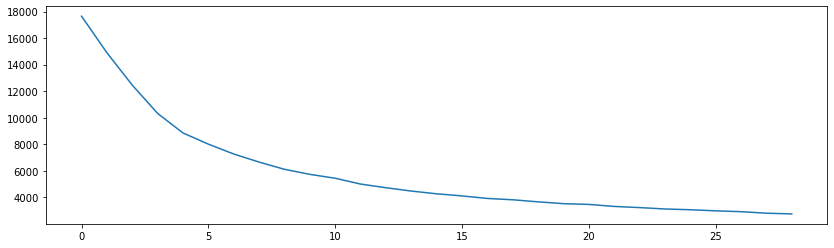

In [103]:
isomap_kmeans = make_pipeline(
    StandardScaler(),
    Isomap(n_components=5),
    StandardScaler(),
    KMeans(),
)

scores = []
for n_clusters in tqdm(range(2, 30 + 1)):
    isomap_kmeans.set_params(kmeans__n_clusters = n_clusters)
    labels = isomap_kmeans.fit(daily_train_features)
    scores.append(isomap_kmeans["kmeans"].inertia_)
    
pd.Series(scores).plot()

In [99]:
isomap_kmeans = make_pipeline(
    StandardScaler(),
    Isomap(n_components=3),
    StandardScaler(),
    KMeans(n_clusters=5),
)

In [ ]:
proj = TSNE(
    perplexity=50,
    learning_rate="auto",
    init="pca",
)
cluster = DBSCAN(eps=0.1)

In [302]:
tsne_dbscan = make_pipeline(
    StandardScaler(),
    # TSNE(perplexity=50, learning_rate="auto", init="pca"),
    #StandardScaler(),
    DBSCAN(eps=0.1),
)

In [303]:
labels = tsne_dbscan.fit_predict(daily_train_features_sel)
labels = pd.Series(labels, index=np.arange(1, len(labels) + 1))

In [310]:
X = daily_train_features_sel.copy()
X = StandardScaler().fit_transform(X)
X = TSNE(perplexity=50, learning_rate="auto", init="pca").fit_transform(X)
X = StandardScaler().fit_transform(X)
labels = DBSCAN(eps=0.1).fit_predict(X)
labels = pd.Series(labels, index=np.arange(1, len(labels) + 1))

C:\Users\ariel\anaconda3\envs\m4-forecasting\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.



In [311]:
labels.value_counts()

 5     854
 2     698
 0     639
 10    595
 6     566
 8     320
 1     232
 7     230
 3      54
 4      23
 9       6
 11      6
-1       4
dtype: int64

[372 183 180 417 297 374 321  83 303 293]


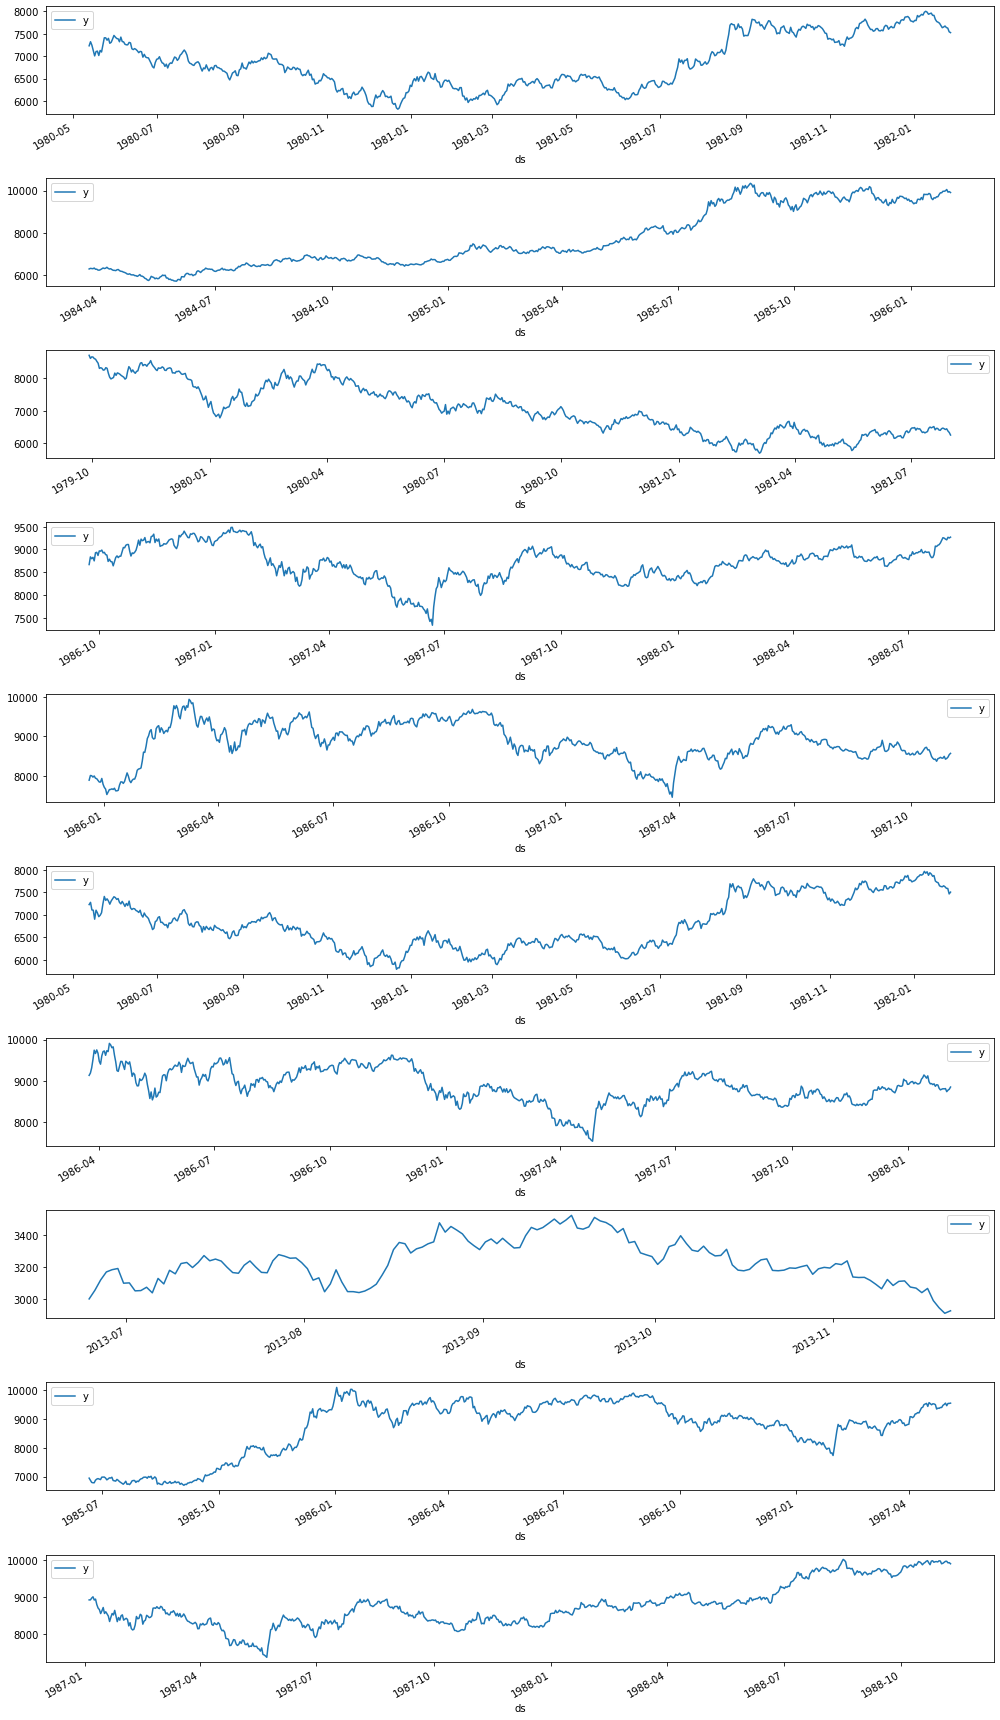

In [330]:
label = 1

cluster = np.array(labels[labels == label].index)
np.random.shuffle(cluster)
cluster_sample = cluster[:10]

print(cluster_sample)
f, axs = plt.subplots(len(cluster_sample), figsize=(14, 24))
if not isinstance(axs, np.ndarray):
    axs = [axs]
for ax, elem in zip(axs, cluster_sample):
    daily_train.loc[daily_train.id == elem, ["ds", "y"]].set_index("ds").plot(ax=ax)
    
f.tight_layout()